## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff 
from ordpy import complexity_entropy

import functions
import export_creation

## Functions definition

In [2]:
def main(param, DATA_NAME, PLOT, values, labels):
    """
    Given a dataset, with it's respective values and labels, creates a new representation for the data, using SAX transformation. After that,
    groups close symbols in the series, according to a given parameter.

    -----------
    Parameters:
    param (tuple): (number of bins, window_size)
    DATA_NAME (string): name of the folder in which to put the metrics and figures for the dataset.
    PLOT (bool): indicates if a histogram of the symbols distribution is to be plotted.
    values (pd.Dataframe): values of the dataset.
    labels (pd.Series): labels of the dataset.

    -----------
    Returns:
    new_rep (pd.Dataframe): new representation for the data values.
    """
    symbols_dict = functions.compute_symbols_dictionary(np.unique(sax_values), window_size=param[1])

    # perform SAX transformation
    sax_values = functions.run_sax(values, n_bins=param[0])
    sax_data = pd.DataFrame(sax_values.reshape(values.shape))

    # create new representation
    new_rep = sax_data.apply(lambda row : functions.create_new_representation(row, window_size=param[1], dict=symbols_dict), axis=1)

    # calculate jensenshannon distance based on the new representation
    pairwise_js = functions.calculate_js_distance(new_rep, labels)
    eq_class, diff_class = get_js_by_class(pairwise_js, labels)
    export_creation.save_js_metrics(eq_class, diff_class, DATA_NAME, param[1], param[0])

    # calculate entropy and statistical complexity of the data
    comp_entrop = [complexity_entropy(new_rep[i]) for i in range(new_rep.shape[0])]
    comp_entrop = pd.DataFrame(comp_entrop, columns=['entropy', 'statistical_complexity'])
    export_creation.plot_entropy_sc(comp_entrop, labels, DATA_NAME, param[1], param[0])

    return new_rep

In [3]:
def load_data(DATA_NAME):
    """
    Load a dataset.
    """
    data = arff.loadarff(f'../data/{DATA_NAME}.arff')
    data = pd.DataFrame(data[0])
    labels = data['target']
    values = data.drop('target', axis=1)
    return values, labels

## Run databases

### Time Series Classification

In [4]:
DATA_NAME1 = 'AbnormalHeartbeat/AbnormalHeartbeat_TRAIN'
DATA_NAME2 = 'AbnormalHeartbeat/AbnormalHeartbeat_TEST'
PLOT_NAME = 'AbnormalHeartbeat'

In [5]:
# DATA_NAME1 = 'ArticularyWordRecognition/ArticularyWordRecognition_TRAIN'
# DATA_NAME2 = 'ArticularyWordRecognition/ArticularyWordRecognition_TEST'
# PLOT_NAME = 'ArticularyWordRecognition'

In [6]:
# DATA_NAME1 = 'Car/Car_TEST'
# DATA_NAME2 = 'Car/Car_TRAIN'
# PLOT_NAME = 'Car'

In [7]:
# DATA_NAME1 = 'ChlorineConcentration/ChlorineConcentration_TRAIN'
# DATA_NAME2 = 'ChlorineConcentration/ChlorineConcentration_TEST'
# PLOT_NAME = 'ChlorineConcentration'

In [8]:
# DATA_NAME1 = 'ACSF1/ACSF1_TEST'
# DATA_NAME2= 'ACSF1/ACSF1_TRAIN'
# PLOT_NAME = 'ACSF1'

In [9]:
# DATA_NAME1 = 'SyntheticControl/SyntheticControl_TRAIN' 
# DATA_NAME2 = 'SyntheticControl/SyntheticControl_TEST' 
# PLOT_NAME = 'SyntheticControl'

In [10]:
# DATA_NAME1 = 'TwoPatterns/TwoPatterns_TRAIN'
# DATA_NAME2 = 'TwoPatterns/TwoPatterns_TEST'
# PLOT_NAME = 'TwoPatterns'

In [ ]:
# DATA_NAME1 = 'BeetleFly/BeetleFly_TRAIN'
# DATA_NAME2 = 'BeetleFly/BeetleFly_TEST'
# PLOT_NAME = 'BeetleFly'

In [ ]:
# DATA_NAME1 = 'BirdChicken/BirdChicken_TRAIN'
# DATA_NAME2 = 'BirdChicken/BirdChicken_TEST'
# PLOT_NAME = 'BirdChicken'

### HASC

In [ ]:
DATA_NAME1 = DATA_NAME2 = ''
PLOT_NAME = 'HASC'

dados_info = "dados_2"
data_group_name = "person101"
database_name = "HASC1002"
colnames = ["x", "y", "z"]

df = pd.read_parquet("../data/01_og_HASC/{}/{}/{}_concat.parquet".format(dados_info, data_group_name, database_name))
df_label = pd.read_csv("../data/01_og_HASC/{}/{}/{}.label".format(dados_info, data_group_name, database_name), header=None)
df_label.columns = ["timestamp_start", "timestamp_end", "classe"]
df.reset_index(drop=True, inplace=True)

for tmps in df_label["timestamp_end"][:-1]:
    print(len(df[df["timestamp"] >= tmps]["timestamp"]))
    
real_cp = []
for tmp_start, tmp_end in zip(df_label["timestamp_start"],df_label["timestamp_end"]) :
    print(tmps)
    min_tmp = max(df[(df["timestamp"] >= tmp_start) & (df["timestamp"] <= tmp_end)]["timestamp"])
    index_ch = df[df["timestamp"] == min_tmp].index.values[0]+1
    real_cp.append(index_ch)

In [ ]:
df

In [ ]:
real_cp = [cp - 890 for cp in real_cp]
real_cp

In [ ]:
values = df.drop(columns='timestamp').apply(lambda x:np.linalg.norm(x.values), axis=1)
values = values.drop(index=[i for i in range(890)]).reset_index(drop=True)
values = values.drop(index=[i for i in range(real_cp[-1], len(values))]).reset_index(drop=True)

In [ ]:
values

In [ ]:
df_label

In [ ]:
labels = df_label.drop(index=11)['classe']
labels

## Execution

In [5]:
# Parameters

PARAM = [(3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)] # (n_bins, window_size)
# PARAM = [(5, 3), (5, 4), (5, 5)]
param = (3, 3)
PLOT = False
HASC = False

In [6]:
# Load data

if not HASC:
    values, labels = load_data(DATA_NAME1)

    if DATA_NAME2:
        values1, labels1 = load_data(DATA_NAME2)
        values = pd.concat([values, values1], ignore_index=True)
        labels = pd.concat([labels, labels1], ignore_index=True)

In [7]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Columns: 18530 entries, att1 to att18530
dtypes: float64(18530)
memory usage: 57.8 MB


In [14]:
# for param in PARAM:
#     print()
#     print(f'n_bins: {param[0]}, window_size: {param[1]}')
#     main(param, PLOT_NAME, PLOT, values, labels, real_cp)

In [9]:
# Perform SAX transformation

sax_values = functions.run_sax(values, n_bins=param[0])
symbols_dict = functions.compute_symbols_dictionary(np.unique(sax_values), window_size=param[1])
sax_data = pd.DataFrame(sax_values.reshape(values.shape))

In [16]:
# Create new representation using sliding window

# new_rep = sax_data.apply(lambda row : functions.create_new_representation(row, window_size=param[1], dict=symbols_dict), axis=1)
# new_rep

In [17]:
# new_rep.to_csv('./new_rep.csv', index=None)

In [10]:
new_rep = pd.read_csv('./new_rep.csv', index_col=False)
new_rep = new_rep.drop(columns='Unnamed: 0')

In [12]:
new_rep.head(10)

,0,1,2,3,4,5,6,7,8,9,...,18518,18519,18520,18521,18522,18523,18524,18525,18526,18527
0,15,2,2,2,2,2,2,3,7,20,...,2,2,2,2,2,2,2,2,2,2
1,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
2,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,21,25,38,38
3,20,20,20,20,20,20,20,20,20,20,...,38,38,38,38,38,38,38,38,37,34
4,15,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
5,38,38,38,38,38,38,38,38,38,38,...,20,20,20,20,20,20,20,20,20,20
6,38,38,38,38,38,38,38,38,38,38,...,20,20,20,20,20,20,20,20,20,20
7,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
8,25,38,38,38,38,38,38,38,38,38,...,2,2,2,2,2,2,2,2,2,2
9,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [13]:
new_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Columns: 18528 entries, 0 to 18527
dtypes: int64(18528)
memory usage: 57.8 MB


In [14]:
# Calculate frequency of symbols for each instance

symbols = np.unique(new_rep)
classes = np.unique(labels)
frequencies = new_rep.apply(lambda row : functions.calculate_frequency(row, symbols), axis=1)
frequencies

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.196945,0.013817,0.000054,0.000594,0.013763,0.000486,0.000000,0.000000,0.000054,0.013925,...,0.013601,0.000000,0.000000,0.000000,0.000486,0.013277,0.000378,0.000000,0.013655,0.181833
1,0.047658,0.004588,0.000000,0.000162,0.004804,0.000054,0.000000,0.000000,0.000000,0.004588,...,0.004372,0.000000,0.000000,0.000000,0.000000,0.004372,0.000270,0.000000,0.004372,0.047873
2,0.052299,0.003940,0.000000,0.000108,0.003886,0.000108,0.000000,0.000000,0.000000,0.003940,...,0.003940,0.000000,0.000000,0.000000,0.000108,0.003778,0.000000,0.000000,0.003886,0.040857
3,0.147668,0.011604,0.000432,0.000270,0.010147,0.001781,0.000000,0.000000,0.000432,0.011928,...,0.010471,0.000108,0.000000,0.000000,0.000864,0.010201,0.000108,0.000108,0.010794,0.136820
4,0.150097,0.008366,0.000432,0.000486,0.007070,0.001565,0.000000,0.000000,0.000432,0.008474,...,0.007988,0.000378,0.000000,0.000000,0.001187,0.007070,0.000486,0.000378,0.008042,0.132286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0.076425,0.006099,0.000216,0.000108,0.005343,0.000648,0.000000,0.000000,0.000216,0.006315,...,0.005289,0.000000,0.000000,0.000000,0.000594,0.005073,0.000054,0.000000,0.005505,0.063202
405,0.216969,0.012036,0.000054,0.000324,0.011334,0.000972,0.000000,0.000054,0.000054,0.012144,...,0.013061,0.000000,0.000000,0.000000,0.000864,0.012953,0.000810,0.000000,0.013115,0.220423
406,0.111723,0.008042,0.000000,0.000216,0.007826,0.000594,0.000000,0.000054,0.000000,0.007934,...,0.009175,0.000108,0.000000,0.000000,0.000756,0.008690,0.000756,0.000108,0.009013,0.114098
407,0.062284,0.007556,0.000000,0.000054,0.006477,0.001187,0.000000,0.000000,0.000000,0.007502,...,0.006369,0.000054,0.000000,0.000000,0.000378,0.006099,0.000000,0.000054,0.006315,0.064767


In [15]:
symbols

array([ 2,  3,  4,  6,  7,  8, 10, 11, 12, 15, 16, 17, 19, 20, 21, 23, 24,
       25, 28, 29, 30, 32, 33, 34, 36, 37, 38])

In [107]:
# Calculate Jensenshannon distance

from scipy.spatial.distance import squareform, jensenshannon
from itertools import combinations

pairwise_js = np.zeros((len(frequencies), len(frequencies)))
pairwise_js[np.triu_indices(len(frequencies), k=1)] = [jensenshannon(x, y) for x, y in combinations(frequencies.values, r=2)]
pairwise_js += pairwise_js.T
pairwise_js = pairwise_js
pairwise_js.shape

(409, 409)

In [139]:
eq_class_js = np.ones(pairwise_js.shape) * -1
diff_class_js = np.ones(pairwise_js.shape) * -1

for i in range(pairwise_js.shape[0]):
    indexes = (labels[i + 1:] == labels[i])
    p_tmp = pairwise_js[i, i + 1:]
    # Get JS distance from instances that belong to the same class
    eq_tmp = eq_class_js[i, i + 1:]
    eq_tmp[indexes] = p_tmp[indexes]
    # Get JS distance from instances that belong to the different classes
    diff_tmp = diff_class_js[i, i + 1:]
    diff_tmp[~indexes] = p_tmp[~indexes]

In [140]:
eq_class_js = eq_class_js.flatten()
eq_class_js = eq_class_js[np.where(eq_class_js != -1)]

In [141]:
eq_class_js.shape

(50546,)

In [142]:
diff_class_js = diff_class_js.flatten()
diff_class_js = diff_class_js[np.where(diff_class_js != -1)]

In [143]:
diff_class_js.shape

(32890,)

Text(0.5, 0, 'Distance')

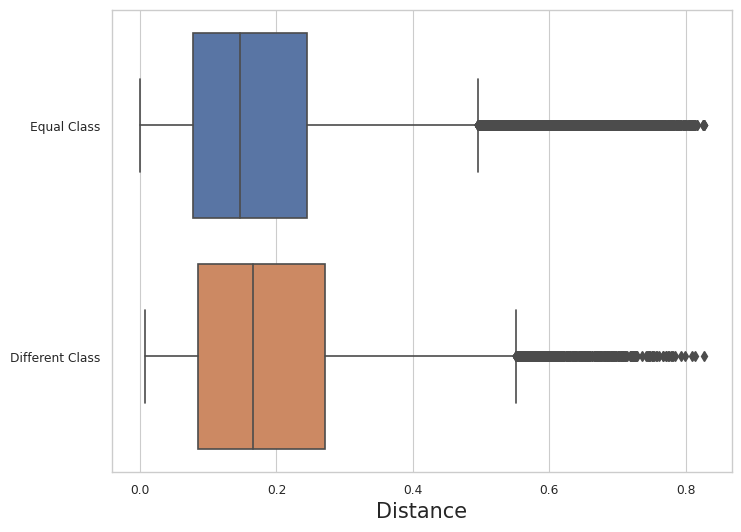

In [147]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})  
plt.figure(figsize=(8, 6))

eq_class = pd.Series(eq_class_js)
diff_class = pd.Series(diff_class_js)
combined_distances = pd.DataFrame({'Equal Class' : eq_class,
                                    'Different Class' : diff_class})

fig = sns.boxplot(data=combined_distances, orient='h')
fig.set_xlabel(f'Distance')

In [22]:
# HASC
# new_data = []
# for i in range(1, len(real_cp)):
#     # create new representation for each instance
#     series = sax_data.iloc[real_cp[i - 1] : real_cp[i] + 1].T.squeeze(axis=0)
#     new_representation = functions.create_new_representation(series, window_size=param[1], dict=symbols_dict)
#     new_data.append(new_representation)
# new_data = np.array(new_data)

In [23]:
a = pd.Series([1, 2, 3, 4])
b = pd.Series([10, 20, 30, 40])
for x in zip(a, a.shift()):
    print(x)

(1, nan)
(2, 1.0)
(3, 2.0)
(4, 3.0)
